# Assignment 2:
### รหัสนักศึกษา: 65130701717
### ชื่อ-นามสกุล: RATTAWIT PATTARACHAROENPONG
### หลักสูตร: SED

## Regression

### Regression with Single Feature

0. import package ที่จำเป็นต้องใช้ 

In [360]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

1. อ่านข้อมูล datasets/advertising_and_sales.csv  เก็บไว้ในตัวแปร data_df และแสดงข้อมูล 5 บรรทัดแรก


In [361]:
data_df=pd.read_csv('datasets/advertising_and_sales.csv')
data_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


2. สร้าง feature X จาก 'radio' และ target y จาก 'sales' 

In [362]:
data_df = data_df[data_df.tv>0]
data_df = data_df[data_df.radio>0]
data_df = data_df[data_df.social_media>0]
data_df = data_df[data_df.sales>0]

X = data_df['radio'].values
y = data_df['sales'].values

3. แบ่งข้อมูลสอน 80% (X_train, y_train)  และข้อมูลทดสอบ 20% (X_test, y_test)

In [363]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)
X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

4. สร้าง linear regression model ชื่อ **reg_model1** โดยใช้  X_train, y_train

In [364]:
reg_model1 = LinearRegression()
reg_model1.fit(X_train, y_train)

LinearRegression()

5. plot จุดข้อมูลสอนเป็นสีน้ำเงิน และ regression line เป็นสีแดง

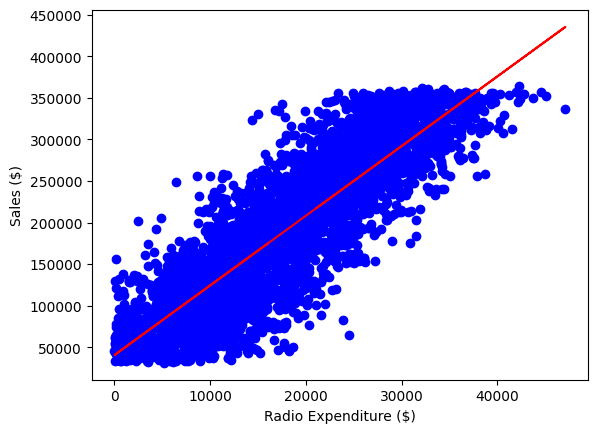

In [365]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X_train, y_train, color="blue")

# Create line plot
# plt.plot([X_train], reg_model1.predict(), color="red")
plt.plot(X_train, reg_model1.predict(X_train), color='red')
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

6. ทำนาย X_test โดยใช้ โมเดลที่สร้างขึ้นในข้อ 4

In [366]:
y_pred = reg_model1.predict(X_test)

7. หาค่า MSE 

In [367]:
mean_squared_error(y_test, y_pred, squared=False)

45393.628758923995

8. หาค่า R-square 

In [368]:
reg_model1.score(X_test,y_test)

0.7597236934627745

### Regression with Multiple Features
ใช้ข้อมูล data_df ต่อเนื่องจากด้านบน

In [369]:
# df = pd.DataFrame(data_df)
# print(df['influencer'].unique())

label = LabelEncoder()
data_df['influencer'] = label.fit_transform(data_df['influencer'])
data_df

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,1,54732.76
1,13000.0,9237.76,2409.57,1,46677.90
2,41000.0,15886.45,2913.41,1,150177.83
3,83000.0,30020.03,6922.30,1,298246.34
4,15000.0,8437.41,1406.00,2,56594.18
...,...,...,...,...,...
4541,26000.0,4472.36,717.09,2,94685.87
4542,71000.0,20610.69,6545.57,3,249101.92
4543,44000.0,19800.07,5096.19,2,163631.46
4544,71000.0,17534.64,1940.87,0,253610.41


1. สร้าง features X จากทุกคอลัมน์ ยกเว้น 'sales' 
และ สร้าง target y จาก 'sales' 

In [370]:
X = data_df.drop(['sales'], axis=1).values
y = data_df['sales'].values
print(X.shape)
print(y.shape)

(4546, 4)
(4546,)


2. แบ่งข้อมูลสอน 80%  (X_train, y_train) และข้อมูลทดสอบ 20%  (X_test, y_test) 


In [371]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)

3. สร้าง linear regression model ชื่อ **reg_model2** โดยใช้  X_train, y_train
ทำนาย X_test

In [372]:
reg_model2 = LinearRegression()
reg_model2.fit(X_train, y_train)

LinearRegression()

4. ทำนาย X_test

In [373]:
y_pred = reg_model2.predict(X_test)

5.  หาค่า MSE 

In [374]:
mean_squared_error(y_test, y_pred, squared=False)

2989.9132305951507

6. หาค่า R-square 

In [375]:
reg_model2.score(X_test,y_test)

0.998957590611288

7. อธิบายเปรียบเทียบประสิทธิภาพ MSE , R-square เมื่อใช้ single feature และ multiple features 

เมื่อใช้หลายตัวแปล ผลของการทำนาย แม่นยำมากขึ้น จาก ค่า MSE ลดลง และ R-square มากขึ้น

## Classification

0. import package ที่จำเป็นต้องใช้ 

In [376]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

1. อ่านข้อมูล datasets/diabetes.csv  เก็บไว้ในตัวแปร data_df และแสดงข้อมูล 5 บรรทัดแรก 

In [377]:
data_df = pd.read_csv('datasets/diabetes.csv')
data_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


2. สร้าง features X จากทุกคอลัมน์ ยกเว้น 'diabetes' 
และ สร้าง target y จาก 'diabetes' 

In [378]:
X = data_df.drop(['diabetes'], axis=1).values
y = data_df['diabetes'].values
print(X.shape)
print(y.shape)

(768, 8)
(768,)


3. แบ่งข้อมูลสอน 70%  (X_train, y_train) และข้อมูลทดสอบ 30%  (X_test, y_test) 

In [379]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

### KNN

1. สร้าง knn model ชื่อ **knn_model** โดยใช้  X_train, y_train กำหนด k = 9

In [380]:
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

2. ทำนาย X_test โดยใช้ **knn_model** ผลการทำนาย เก็บไว้ที่ตัวแปร y_pred_knn

In [381]:
y_pred_knn = knn_model.predict(X_test)

3. หา confusion matrix, accuracy, precision, recall, f1

In [382]:
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test,y_pred_knn))

[[120  27]
 [ 38  46]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       147
           1       0.63      0.55      0.59        84

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.69       231
weighted avg       0.71      0.72      0.71       231



### Logistic Regression

1. สร้าง logistic regression model ชื่อ **logreg_model** โดยใช้  X_train, y_train 

In [383]:
logreg_model = LogisticRegression(solver='liblinear')
logreg_model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

2. ทำนาย X_test โดยใช้ **logreg_model** ผลการทำนาย เก็บไว้ที่ตัวแปร y_pred_logreg

In [384]:
y_pred_logreg = logreg_model.predict(X_test)

3. หา confusion matrix, accuracy, precision, recall, f1

In [385]:
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test,y_pred_logreg))

[[130  17]
 [ 38  46]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.83       147
           1       0.73      0.55      0.63        84

    accuracy                           0.76       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.76      0.75       231



### SVM

1. สร้าง logistic regression model ชื่อ **svm_model1** โดยใช้  X_train, y_train  กำหนด kernel = 'rbf'

In [386]:
svm_model1 = SVC(kernel='rbf')
svm_model1.fit(X_train,y_train)

SVC()

2. ทำนาย X_test โดยใช้ **svm_model1** ผลการทำนาย เก็บไว้ที่ตัวแปร y_pred_svm_model1

In [387]:
y_pred_svm_model1 = svm_model1.predict(X_test)

3. หา confusion matrix, accuracy, precision, recall, f1 จาก ผลข้อ 2

In [388]:
print(confusion_matrix(y_test, y_pred_svm_model1))
print(classification_report(y_test,y_pred_svm_model1))

[[133  14]
 [ 43  41]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       147
           1       0.75      0.49      0.59        84

    accuracy                           0.75       231
   macro avg       0.75      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231



4. สร้าง logistic regression model ชื่อ **svm_model2** โดยใช้  X_train, y_train  กำหนด kernel = 'linear'

In [389]:
svm_model2 = SVC(kernel='linear')
svm_model2.fit(X_train,y_train)

SVC(kernel='linear')

5. ทำนาย X_test โดยใช้ **svm_model2** ผลการทำนาย เก็บไว้ที่ตัวแปร y_pred_svm_model2

In [390]:
y_pred_svm_model2 = svm_model2.predict(X_test)

6. หา confusion matrix, accuracy, precision, recall, f1 จากผลข้อ 5

In [391]:
print(confusion_matrix(y_test, y_pred_svm_model2))
print(classification_report(y_test,y_pred_svm_model2))

[[132  15]
 [ 36  48]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       147
           1       0.76      0.57      0.65        84

    accuracy                           0.78       231
   macro avg       0.77      0.73      0.75       231
weighted avg       0.78      0.78      0.77       231



### สรุปผล การ Classification
อธิบายในแต่ละแง่ตัวชี้วัดประสิทธิภาพ

KNN เป็นแบบจำลองที่ใช้ในการหาข้อมูลที่ใกล้เคียงกับข้อมูลปัจจุบัน โดยจะนำข้อมูลปัจจุบันไปเปรียบเทียบกับข้อมูลอื่นๆในฐานข้อมูล และจะเลือก k ข้อมูลที่ใกล้เคียงกับข้อมูลปัจจุบันมากที่สุด และนำข้อมูลที่ได้จากการเปรียบเทียบไปใช้ในการจัดกลุ่ม

Logistic Regression เป็นแบบจำลองที่ใช้ในการหาความสัมพันธ์ระหว่างตัวแปรต่างๆ โดยจะนำตัวแปรต่างๆไปเปรียบเทียบกับค่าของตัวแปรที่ได้จากการวิเคราะห์ และนำค่าที่ได้
มากำหนดเป็นโอกาสที่จะเกิดความเป็นไปได้ของเหตุการณ์ต่างๆ โดยใช้ฟังก์ชัน Sigmoid ในการคำนวณโอกาสที่เกิดความเป็นไปได้ ซึ่งจะได้ค่าที่อยู่ระหว่าง 0 ถึง 1 ซึ่งจะใช้ในการจัดกลุ่ม

SVM เป็นแบบจำลองที่ใช้ในการหาขอบเขตของข้อมูลที่แตกต่างกัน โดยใช้วิธีการหาเส้นขอบเขตที่แตกต่างกันมากที่สุด โดยจะนำข้อมูลที่แตกต่างกันมากที่สุดไปใช้เป็นตัวแทนของข้อมูล ซึ่งจะใช้ในการจัดกลุ่มและการคำนวณความแม่นยำ.

## ML Paper
ค้นบทความจาก ieee explore เลือกที่เกี่ยวกับ ML ที่ได้เรียนไป

1. ชื่อบทความ และ ลิงค์บทความ

Parallel K Nearest Neighbor Matching for 3D Reconstruction

https://ieeexplore.ieee.org/document/8703749

2. ข้อมูลที่ผู้วิจัยใช้ 

J. Yang, K. Sim, W. Lu and B. Jiang, "Predicting stereoscopic image quality via stacked auto-encoders based on stereopsis formation", IEEE Trans. Multimedia.

J. Yang, B. Jiang, B. Li, K. Tian and Z. Lv, "A fast image retrieval method designed for network big data", IEEE Trans. Ind. Informat., vol. 13, pp. 2350-2359, Oct. 2017.

B. Jiang, J. Yang, Z. Lv, K. Tian, Q. Meng and Y. Yan, "Internet cross-media retrieval based on deep learning", J. Vis. Commun. Image Represent., vol. 48, pp. 356-366, Oct. 2017.

M. Cao, S. Li, W. Jia, S. Li and X. Liu, "Robust bundle adjustment for large-scale structure from motion", Multimedia Tools Appl., vol. 76, no. 21, pp. 21843-21867, Nov. 2017.

Q. Cui, V. Fragoso, C. Sweeney and P. Sen, GraphMatch: Efficient large-scale graph construction for structure from motion, 2017, [online] Available: https://arxiv.org/abs/1710.01602.

3. วิธีที่ผู้วิจัยใช้ / เสนอปรับปรุงให้ดีขึ้น

In recent years, a 3D reconstruction based on structure from motion (SFM) has attracted much attention from the communities of computer vision and graphics. It is well known that the speed and quality of SFM systems largely depend on the technique of feature tracking. If a big volume of image data is inputted for SFM, the speed of this SFM system would become very slow. And, this problem becomes severer for large-scale scenes, which typically needs to capture several thousands of images to recover the point-cloud model of the scene. However, none of the existing methods fully addresses the problem of fast feature tracking. Brute force matching is capable of producing correspondences for small-scale scenes but often getting stuck in repeated features. Hashing matching can only deal with middle-scale scenes and is not capable of large-scale scenes. In this paper, we propose a new feature tacking method working in a parallel manner rather than in a single thread scheme. Our method consists of steps of keypoint detection, descriptor computing, descriptor matching by parallel k -nearest neighbor (Parallel-KNN) search, and outlier rejecting. This method is able to rapidly match a big volume of keypoints and avoids to consume high computation time, then yielding a set of correct correspondences. We demonstrate and evaluate the proposed method on several challenging benchmark datasets, including those with highly repeated features, and compare to the state-of-the-art methods. The experimental results indicate that our method outperforms the compared methods in both efficiency and effectiveness.

4. ตัวชี้วัดประสิทธิภาพที่ผู้วิจัยใช้ มีค่าดีสุดเท่าไร

Conclusion
To improve the quality of the point-cloud model that is produced by the SFM system, we designed a novel feature tracking method, and have implemented it in parallel architecture with Nvidia CUDA SDK, then resulting in a significant acceleration on computational cost. Specifically, the proposed RTFT method consists of three modules: 1) keypoint detection and descriptor computing, 2) feature matching, and 3) outliers removing. In the first stage, the ORB feature is used to find keypoints and obtain robust descriptions for the detected keypoints. In feature matching process, the Parallel-KNN is utilized to match feature descriptors for decreasing the computational burden in large-scale 3D reconstruction where too many images are available. Moreover, the design logically behind of the Parallel-KNN is easily to generalize for other fields that also need parallel-computing technique. In the last step, we developed a novel approach to rectify the visual correspondences for resulting a set of correct feature matches, this method is only based on the Euclidean distance comparison, and is easily to implementation in programming language. Finally, we assess the RTFT method on three benchmarking datasets with some repeated structures and many repeated features, then result in a desirable performance in both feature matching precision and the quality of the point-cloud model.

In summary, the RTFT is versatile and expansible, which can be easily extended to other applications such as simultaneous localization and mapping, optical flow estimation, and robotics navigation. In the future, we will revise the Parallel-KNN and RTFT, and implement it on the multi-GPU devices for extreme fast acceleration on computation time.